In [1]:
import numpy as np 
import pandas as pd 
import datetime
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline

In [2]:
train_data = pd.read_csv('../input/train_sample.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    251 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


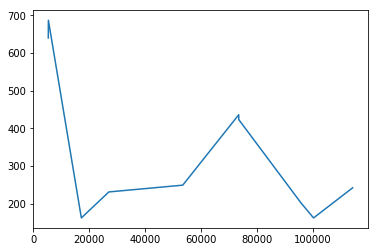

In [4]:
train_data.ip.value_counts()[:10].sort_index().plot()

In [5]:
for col in train_data:
    print (col,'\t',train_data[col].unique().size)

ip 	 34686
app 	 156
device 	 99
os 	 132
channel 	 162
click_time 	 80355
attributed_time 	 252
is_attributed 	 2


In [6]:
train_data.device.unique().size

99

In [7]:
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

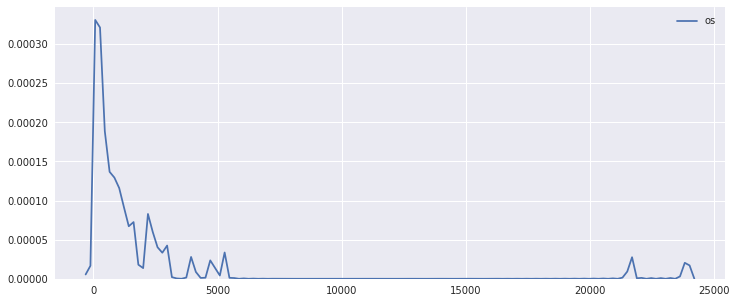

In [8]:
sns.kdeplot(train_data.os.value_counts().sort_index())

In [9]:
train_data.os = train_data.os.astype('str')

**Setting up Garbage Collection**

In [10]:
%del train_data
%gc.collect()

ERROR:root:Line magic function `%del` not found.
ERROR:root:Line magic function `%gc.collect` not found.


**Presetting Data types**

In [11]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'bool',
        }

In [12]:
train_data = pd.read_csv('../input/train_sample.csv', dtype=dtypes)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint16
os                 100000 non-null uint16
channel            100000 non-null uint16
click_time         100000 non-null object
attributed_time    251 non-null object
is_attributed      100000 non-null bool
dtypes: bool(1), object(2), uint16(4), uint32(1)
memory usage: 2.8+ MB


**Selecting #rows of read**

In [14]:
train_data_top_10000 = pd.read_csv('../input/train.csv', nrows=10000, dtype=dtypes)

**Skipping Without Heading**

In [15]:
train = pd.read_csv('../input/train.csv', skiprows=5000000, nrows=1000000, header = None, dtype=dtypes)
train.head()

,0,1,2,3,4,5,6,7
0,37363,12,1,25,245,2017-11-06 20:27:57,NaN,0
1,89913,2,1,9,469,2017-11-06 20:27:57,NaN,0
2,114235,26,1,13,121,2017-11-06 20:27:57,NaN,0
3,18839,3,1,19,442,2017-11-06 20:27:57,NaN,0
4,105580,15,1,13,245,2017-11-06 20:27:57,NaN,0


**Skipping With Heading**

In [16]:
train = pd.read_csv('../input/train.csv', skiprows=range(1, 5000000), nrows=1000000, dtype=dtypes)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,37363,12,1,25,245,2017-11-06 20:27:57,NaN,False
1,89913,2,1,9,469,2017-11-06 20:27:57,NaN,False
2,114235,26,1,13,121,2017-11-06 20:27:57,NaN,False
3,18839,3,1,19,442,2017-11-06 20:27:57,NaN,False
4,105580,15,1,13,245,2017-11-06 20:27:57,NaN,False


**Random Sampling of Lists From Entire Data Set**

In [17]:
lines = 184903891

In [18]:
skiplines = np.random.choice(np.arange(1, lines), size=lines-1-1000000, replace=False)

In [19]:
skiplines=np.sort(skiplines)

In [20]:
#check our list
print('lines to skip:', len(skiplines))
print('remaining lines in sample:', lines-len(skiplines), '(remember that it includes the heading!)')

###################SANITY CHECK###################
#find lines that weren't skipped by checking difference between each consecutive line
#how many out of first 100000 will be imported into the csv?
diff = skiplines[1:100000]-skiplines[2:100001]
remain = sum(diff!=-1)
print('Ratio of lines from first 100000 lines:',  '{0:.5f}'.format(remain/100000) ) 
print('Ratio imported from all lines:', '{0:.5f}'.format((lines-len(skiplines))/lines) )

lines to skip: 183903890
remaining lines in sample: 1000001 (remember that it includes the heading!)
Ratio of lines from first 100000 lines: 0.00542
Ratio imported from all lines: 0.00541


In [21]:
train = pd.read_csv('../input/train.csv', skiprows=skiplines, dtype=dtypes)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,108913,3,1,19,379,2017-11-06 15:45:17,NaN,False
1,99219,3,1,25,379,2017-11-06 15:54:18,NaN,False
2,129667,9,1,19,258,2017-11-06 16:00:01,NaN,False
3,208090,14,1,13,439,2017-11-06 16:00:01,NaN,False
4,208566,12,1,11,245,2017-11-06 16:00:01,NaN,False


In [22]:
del skiplines
gc.collect()

140

In [23]:
train.click_time.describe()

count                 1000000
unique                 234047
top       2017-11-09 06:00:40
freq                       20
Name: click_time, dtype: object

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint16
device             1000000 non-null uint16
os                 1000000 non-null uint16
channel            1000000 non-null uint16
click_time         1000000 non-null object
attributed_time    2461 non-null object
is_attributed      1000000 non-null bool
dtypes: bool(1), object(2), uint16(4), uint32(1)
memory usage: 27.7+ MB


In [25]:
train['click_time'] = pd.to_datetime(train['click_time'])

In [26]:
train['attributed_time'] = pd.to_datetime(train['attributed_time'])

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint16
device             1000000 non-null uint16
os                 1000000 non-null uint16
channel            1000000 non-null uint16
click_time         1000000 non-null datetime64[ns]
attributed_time    2461 non-null datetime64[ns]
is_attributed      1000000 non-null bool
dtypes: bool(1), datetime64[ns](2), uint16(4), uint32(1)
memory usage: 27.7 MB


In [28]:
temp_rows = train.loc[train.is_attributed == True]

In [29]:
temp_rows.is_attributed.value_counts()

True    2461
Name: is_attributed, dtype: int64

In [30]:
train.is_attributed.value_counts()

False    997539
True       2461
Name: is_attributed, dtype: int64

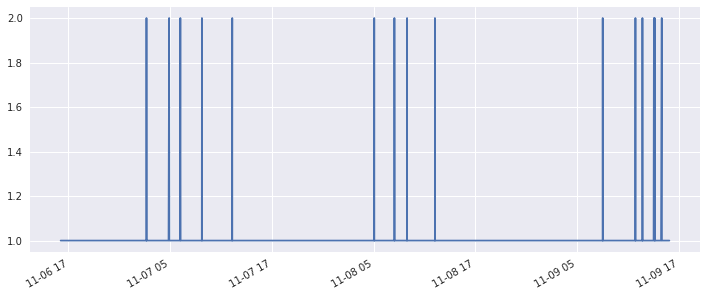

In [31]:
train['attributed_time'].value_counts().sort_index().plot()

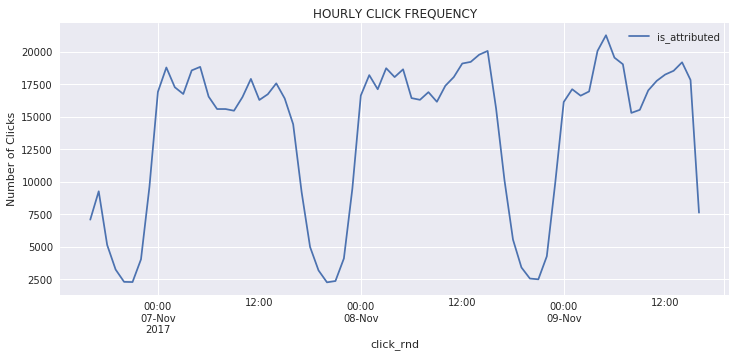

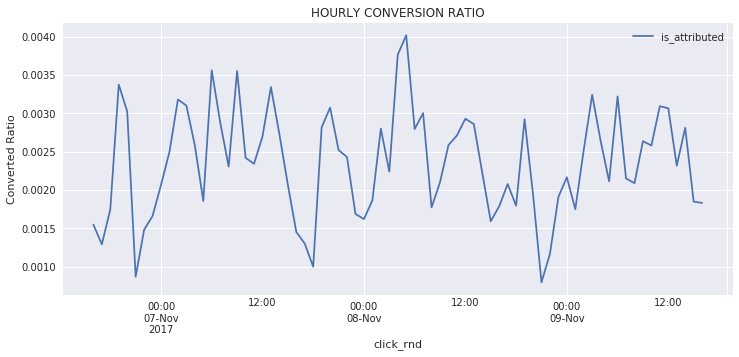

In [32]:
#round the time to nearest hour
train['click_rnd']=train['click_time'].dt.round('H')  

#check for hourly patterns
train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

**Extracted only rows where `is_attributed` == True**

In [33]:
empty_df = pd.DataFrame()
chunksize = 10**6

In [34]:
for chunk in pd.read_csv('../input/train.csv', chunksize=chunksize, dtype = dtypes):
    filtered = chunk.loc[chunk.is_attributed == True]
    empty_df = pd.concat([empty_df, filtered], ignore_index=True)

In [35]:
empty_df.info()
empty_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456846 entries, 0 to 456845
Data columns (total 8 columns):
ip                 456846 non-null uint32
app                456846 non-null uint16
device             456846 non-null uint16
os                 456846 non-null uint16
channel            456846 non-null uint16
click_time         456846 non-null object
attributed_time    456846 non-null object
is_attributed      456846 non-null bool
dtypes: bool(1), object(2), uint16(4), uint32(1)
memory usage: 12.6+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,True
1,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,True
2,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,True
3,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,True
4,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,True


In [36]:
empty_df['click_time'] = pd.to_datetime(empty_df['click_time'])
empty_df['attributed_time'] = pd.to_datetime(empty_df['attributed_time'])

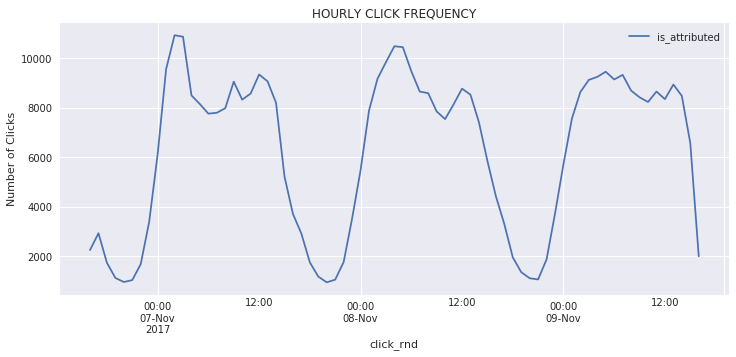

In [48]:
empty_df['click_rnd']=empty_df['click_time'].dt.round('H')  

#check for hourly patterns
empty_df[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

#empty_df[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).mean().plot()
#plt.title('HOURLY CONVERSION RATIO');
#plt.ylabel('Converted Ratio');

In [49]:
gc.collect()

10994

In [55]:
empty_df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'click_rnd'],
      dtype='object')

In [54]:
for col in empty_df:
    print (col, '\t\t', empty_df[col].unique().size)

ip 		 245038
app 		 226
device 		 1869
os 		 116
channel 		 174
click_time 		 191457
attributed_time 		 182057
is_attributed 		 1
click_rnd 		 73


In [58]:
empty_df.device.sort_values().unique()

array([   0,    1,    2, ..., 4216, 4222, 4223], dtype=uint64)

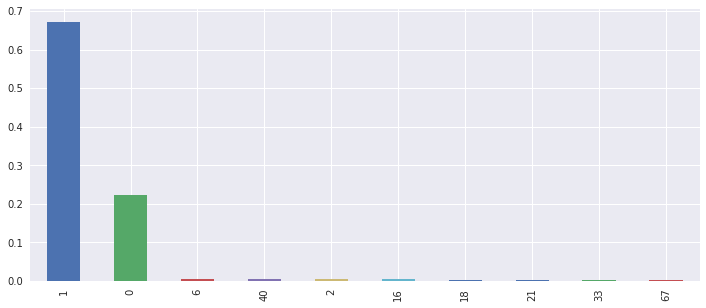

In [66]:
(empty_df.device.value_counts()[:10]/empty_df.device.count()).plot.bar()

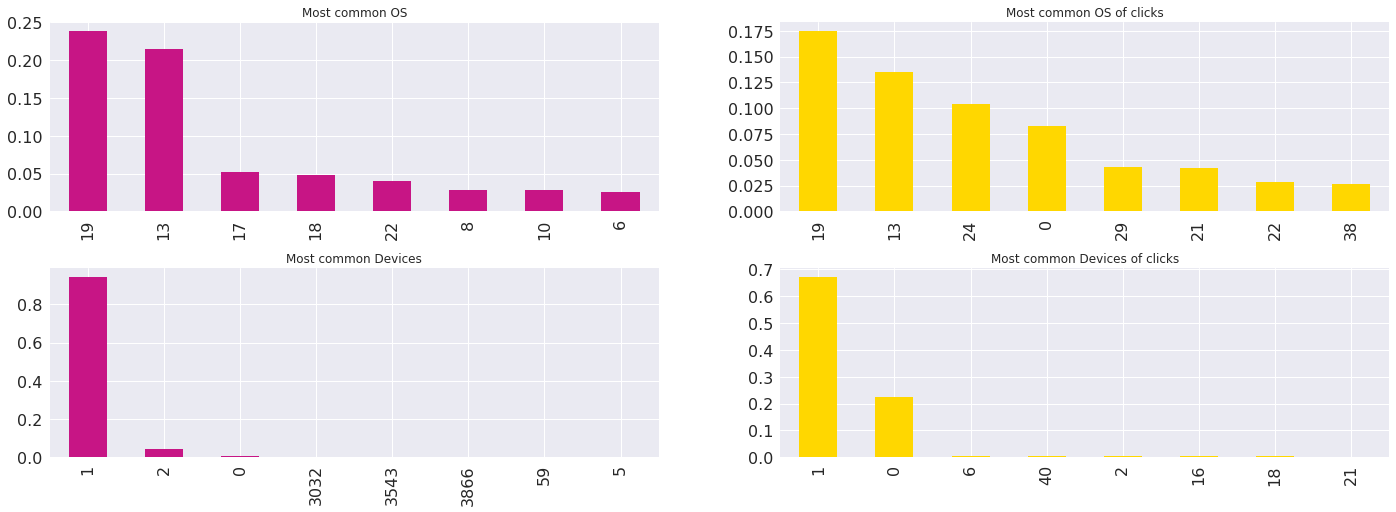

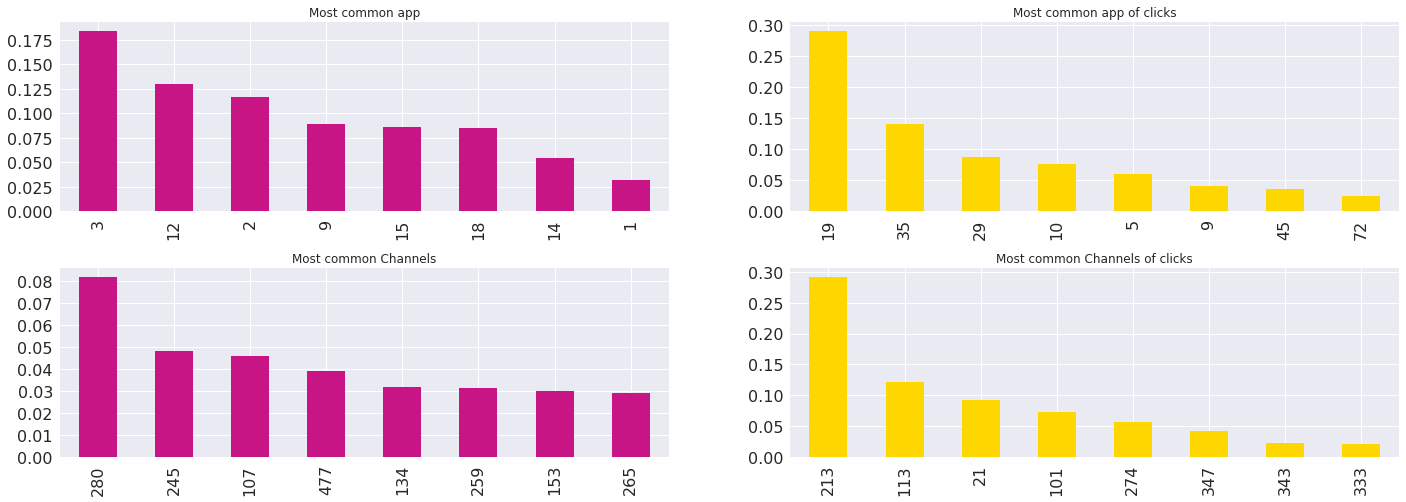

In [67]:
fig, axarr = plt.subplots(2,2, figsize=(24,8))

(train.os.value_counts()[:8]/train.os.count()).plot.bar(color='mediumvioletred', ax =axarr[0][0], fontsize = 16)
axarr[0][0].set_title('Most common OS')
(empty_df.os.value_counts()[:8]/empty_df.os.count()).plot.bar(color='gold', ax =axarr[0][1], fontsize = 16)
axarr[0][1].set_title('Most common OS of clicks')
(train.device.value_counts()[:8]/train.device.count()).plot.bar(color='mediumvioletred', ax =axarr[1][0], fontsize = 16)
axarr[1][0].set_title('Most common Devices')
(empty_df.device.value_counts()[:8]/empty_df.device.count()).plot.bar(color='gold', ax =axarr[1][1], fontsize = 16)
axarr[1][1].set_title('Most common Devices of clicks')

plt.subplots_adjust(hspace=.3)

sns.despine(bottom=True, left=True)

fig_2, axarr_2 = plt.subplots(2,2, figsize=(24,8))

(train.app.value_counts()[:8]/train.app.count()).plot.bar(color='mediumvioletred', ax =axarr_2[0][0], fontsize = 16)
axarr_2[0][0].set_title('Most common app')
(empty_df.app.value_counts()[:8]/empty_df.app.count()).plot.bar(color='gold', ax =axarr_2[0][1], fontsize = 16)
axarr_2[0][1].set_title('Most common app of clicks')
(train.channel.value_counts()[:8]/train.channel.count()).plot.bar(color='mediumvioletred', ax =axarr_2[1][0], fontsize = 16)
axarr_2[1][0].set_title('Most common Channels')
(empty_df.channel.value_counts()[:8]/empty_df.channel.count()).plot.bar(color='gold', ax =axarr_2[1][1], fontsize = 16)
axarr_2[1][1].set_title('Most common Channels of clicks')

plt.subplots_adjust(hspace=.3)

sns.despine(bottom=True, left=True)